In [1]:
!pip -q install wordcloud

is_phishing
0    447395
1     29767
Name: count, dtype: int64


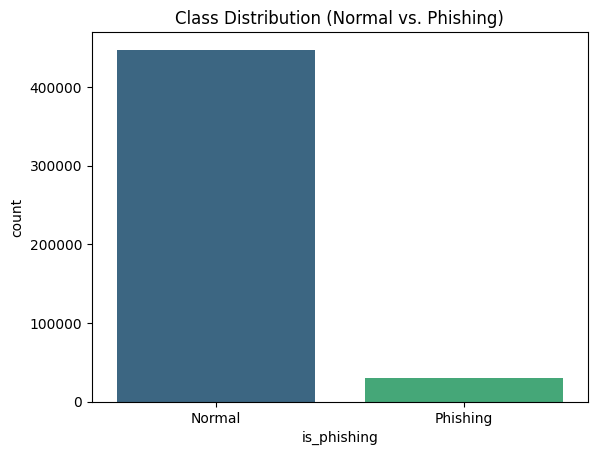

,subject,body,old_label,is_phishing,clean_text
0,RE: Sumas volumes,"RE: Sumas volumes OFFERS To: Dorland, Chris",0.0,0,re: sumas volumes re: sumas volumes offers to:...
1,NaN,Iaia: How the hell are ya? Wanted to drop you ...,0.0,0,iaia: how the hell are ya? wanted to drop you...
2,Re: CA for OUC,"Re: CA for OUC Jared, My only comment is that ...",0.0,0,"re: ca for ouc re: ca for ouc jared, my only c..."
3,Ed Krapels,"Louise, Some time ago I sent you a message reg...",0.0,0,"ed krapels louise, some time ago i sent you a ..."
4,Re: Fwd: Re: ENRON-Resume Interview of James V...,"Shirley, Please, send Johan (address below) th...",0.0,0,re: fwd: re: enron-resume interview of james v...


In [2]:
# --- IMPORTS FOR EDA ---
import pandas as pd
import numpy as np
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
import torch # Import PyTorch
from wordcloud import WordCloud


# 1. Correct Path (Using forward slashes to avoid the SyntaxError)
path = "C:/Users/noaga/OneDrive/Desktop/GitProjects/Cyber_AI_Enhanced_Labs/Project/2.Data preparing and cleaning/Splited_data"

# 2. Load and Label (Ensuring we only assign 0 to Train/Val)
df_train = pd.read_csv(f"{path}/01_train_normal.csv").assign(is_phishing=0)
df_val   = pd.read_csv(f"{path}/02_validation_normal.csv").assign(is_phishing=0)
df_test  = pd.read_csv(f"{path}/03_test_all.csv") # Already has 0s and 1s

# 3. Fuse
df_eda = pd.concat([df_train, df_val, df_test], ignore_index=True)

# 4. Check & Plot
print(df_eda['is_phishing'].value_counts()) # This should show 1s now!

sns.countplot(x='is_phishing', data=df_eda, hue='is_phishing', palette='viridis', legend=False)
plt.title('Class Distribution (Normal vs. Phishing)')
plt.xticks([0, 1], ['Normal', 'Phishing'])
plt.show()

df_eda.head()

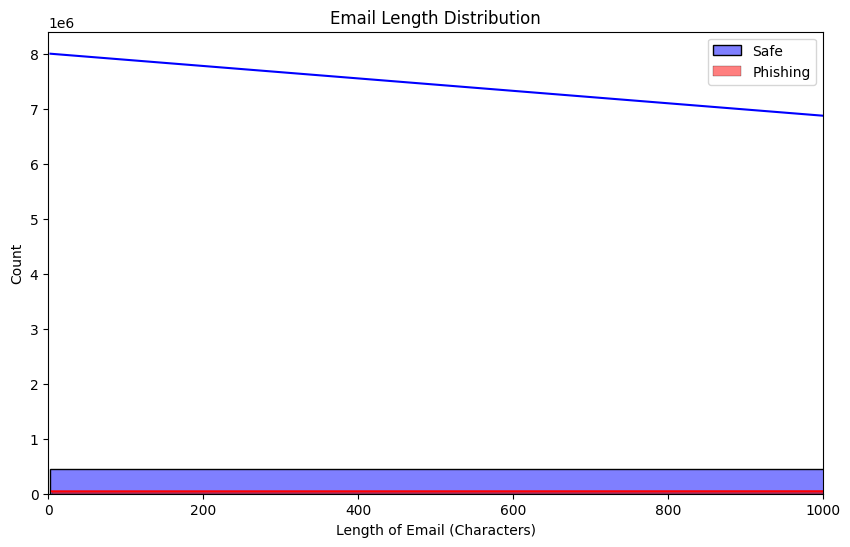

In [3]:
# --- Email Length Distribution Analysis ---

# 1. Create a temporary 'df' to match your exact variable names
df = df_eda.copy()
df['text'] = df['clean_text']
df['label'] = df['is_phishing']

# 2. Create a new column for length
df['length'] = df['text'].astype(str).apply(len)

# 3. Plot distributions
plt.figure(figsize=(10,6))

# Plot Safe (Label 0)
sns.histplot(df[df['label']==0]['length'], color='blue', label='Safe', kde=True, bins=50)

# Plot Phishing (Label 1)
sns.histplot(df[df['label']==1]['length'], color='red', label='Phishing', kde=True, bins=50)

plt.title('Email Length Distribution')
plt.xlabel('Length of Email (Characters)')
plt.legend()
plt.xlim(0, 1000) # Limit x-axis to zoom in
plt.show()

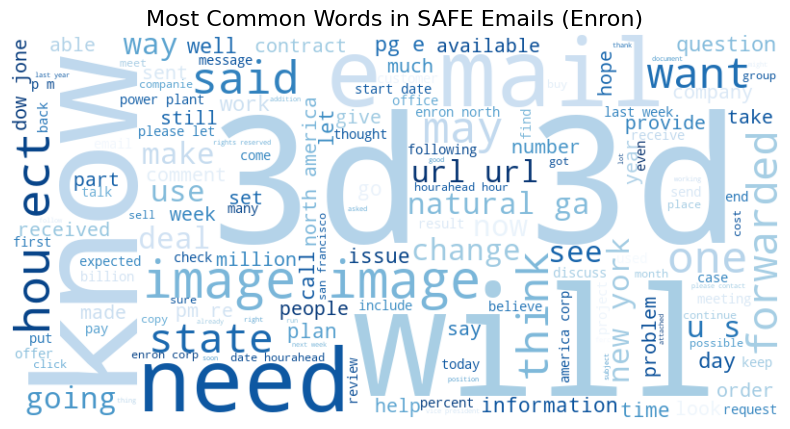

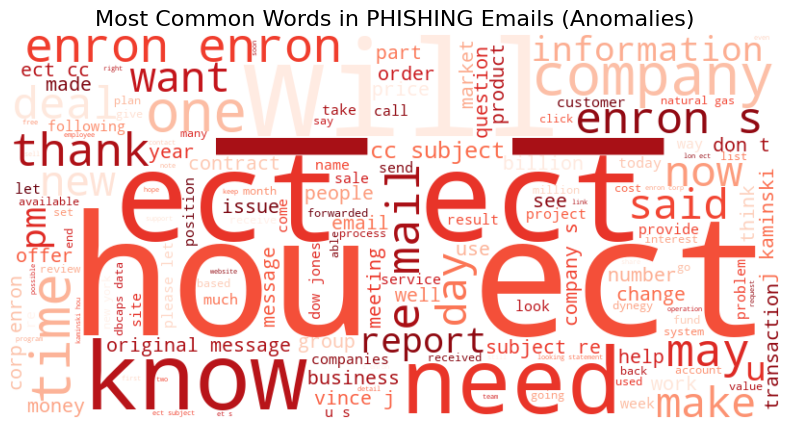

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- Updated Function for your Fused Dataset ---
def plot_wordcloud(label_value, title, color_map):
    # 1. Combine all emails of that label from your fused dataframe
    # We use 'clean_text' (processed text) and 'is_phishing' (standardized label)
    text = " ".join(df_eda[df_eda['is_phishing'] == label_value]['clean_text'].astype(str))
    
    if not text.strip():
        print(f"No text found for label {label_value}")
        return

    # 2. Generate cloud with a specific color theme
    wc = WordCloud(width=800, height=400, 
        background_color='white',colormap=color_map,max_words=150).generate(text)
    
    # 3. Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# --- Run the Plots ---

# Plot Safe Words (Label 0) using a professional Blue theme
plot_wordcloud(0, "Most Common Words in SAFE Emails (Enron)", "Blues")

# Plot Phishing Words (Label 1) using a warning Red theme
plot_wordcloud(1, "Most Common Words in PHISHING Emails (Anomalies)", "Reds")